##Assignment 4
Name: Jonathan Au <br>
Student #: 300827701 <br>

##Question 1
<b>In this assignment, you train a Gaussian mixture model on the Olivetti faces dataset.</b>
1.	Retrieve and load the Olivetti faces dataset. [0 points]
2.	Split the dataset into training, validation, and test sets using stratified sampling to ensure that each set contains the same number of images per person. [0 points]
3.	Apply PCA on the training data, preserving 99% of the variance, to reduce the dataset's dimensionality. [10 points]
4.	Determine the most suitable covariance type for the dataset. [15 points]
5.	Determine the minimum number of clusters that best represent the dataset using either AIC or BIC. [15 points]
6.	Plot the results from steps 3 and 4. [15 points]
7.	Output the hard clustering assignments for each instance to identify which cluster each image belongs to. [2.5 points]
8.	Output the soft clustering probabilities for each instance to show the likelihood of each image belonging to each cluster. [2.5 points]
9.	Use the model to generate some new faces (using the sample() method) and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used). [15 points]
10.	Modify some images (e.g., rotate, flip, darken). [15 points]

Determine if the model can detect the anomalies produced in step 10 by comparing the output of the score_samples() method for normal images and for anomalies. [10 points]


In [45]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings("ignore")

1.	Retrieve and load the Olivetti faces dataset. [0 points]
2.	Split the dataset into training, validation, and test sets using stratified sampling to ensure that each set contains the same number of images per person. [0 points]


In [46]:
# Load olivetti faces
olivetti = fetch_olivetti_faces()
#X = olivetti.data
#Y = olivetti.target
#Z = olivetti.images

X = pd.DataFrame(olivetti["data"])
Y = pd.DataFrame(olivetti["target"])

# Print the description and shapes of the dataset
#print(olivetti.DESCR)
print(X.shape)
print(Y.shape)
#print(Z.shape)

#split into train and test data
#X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=.665)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.665)
for i, (train_index, test_index) in enumerate(sss.split(X, Y)):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_val_test = X.iloc[test_index]
    y_val_test = Y.iloc[test_index]

#split train data into train and validation data
#X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5)
for i, (test_index, val_index) in enumerate(sss2.split(X_val_test, y_val_test)):
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]
    X_val = X.iloc[val_index]
    y_val = Y.iloc[val_index]

#print the shapes of the data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(400, 4096)
(400, 1)
(134, 4096)
(133, 4096)
(133, 4096)


3.	Apply PCA on the training data, preserving 99% of the variance, to reduce the dataset's dimensionality. [10 points]


In [47]:
# Create PCA instance
# set PCA to get 99% of variance
pca = PCA(n_components=0.99)

# Fit train data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
pc = pca.fit_transform(X_train_scaled)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train))


# Print the number of components and the explained variance ratio
print ( "Components =", pca.n_components_ , "\nTotal explained variance =",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components = 108 
Total explained variance = 0.99015


4.	Determine the most suitable covariance type for the dataset. [15 points]


In [48]:
cov_matrix = np.cov(X_train_pca.T)
eigenvalues, eigenvectors = eig(cov_matrix)
print("eigenvalues: \n", eigenvalues)
print("eigenvectors: \n", eigenvectors)


eigenvalues: 
 [19.13889743 11.34414426  6.222867    4.39051594  2.78421753  2.64961803
  1.82265658  1.74184749  1.66034027  1.46942392  1.35707705  1.30518172
  1.03784885  0.95413444  0.90036218  0.83623968  0.77174364  0.75321299
  0.694942    0.61223523  0.60031936  0.56106254  0.51430427  0.49435285
  0.48439437  0.43252629  0.41694697  0.41200285  0.39261959  0.36760621
  0.33003544  0.32646075  0.33667765  0.30995344  0.30369689  0.28597828
  0.28031964  0.26961419  0.26200688  0.24345324  0.24059847  0.23514969
  0.22828898  0.2203711   0.20765705  0.20110333  0.19507981  0.19014314
  0.19213574  0.17824697  0.17424472  0.16966846  0.16827798  0.16268894
  0.161358    0.15723538  0.15147722  0.15000504  0.14751101  0.14282894
  0.13745327  0.13677225  0.13320811  0.04551571  0.04712988  0.0473875
  0.1303826   0.12605899  0.124842    0.04847964  0.04995931  0.05084822
  0.05181532  0.05413794  0.11936385  0.11648327  0.1157901   0.11285993
  0.05646729  0.0574861   0.11016819 

5.	Determine the minimum number of clusters that best represent the dataset using either AIC or BIC. [15 points]


In [49]:
gmm = GaussianMixture().fit(X_train_pca)
print("Gaussian Mixture BIC: ", gmm.bic(X_train_pca))
print("Gaussian Mixture AIC: ", gmm.aic(X_train_pca))

print("Gaussian Mixture Weights: ", gmm.weights_)
print("Gaussian Mixture Means: \n", gmm.means_)
print("Gaussian Mixture Covariances: \n", gmm.covariances_)

Gaussian Mixture BIC:  48352.6049201924
Gaussian Mixture AIC:  30982.95315928664
Gaussian Mixture Weights:  [1.]
Gaussian Mixture Means: 
 [[ 2.40225623e-07  8.89343557e-08  3.09159131e-07 -9.89425983e-08
   1.95515189e-07 -7.92319205e-09 -1.51376407e-07 -3.09143493e-08
   1.70452882e-07  1.35743740e-07  1.99098001e-07 -6.76112388e-08
  -1.06101272e-07  1.06549558e-07  4.73271722e-08  6.28260479e-08
   1.06893591e-07 -2.28773483e-07 -1.31904641e-07 -7.70217670e-08
  -2.35853967e-08 -1.10076768e-07 -2.01575736e-07 -4.97979571e-09
   1.58262286e-07  9.10889079e-08  1.74993079e-07 -2.17505522e-08
  -1.36355355e-07 -1.49022037e-07  1.37210226e-07  1.46120342e-07
  -7.86064054e-08  1.66387033e-07 -4.35080546e-09 -2.78232619e-08
  -1.52264291e-07  7.93322364e-08  5.70226572e-08 -8.08391470e-08
  -1.91206085e-07 -1.02236978e-08 -9.46960454e-08  1.05991372e-07
  -4.74600941e-08  2.45688455e-07  1.14811570e-07 -5.16362766e-08
  -1.21076279e-07 -4.05750835e-08 -7.34059418e-08 -4.73434616e-08
  -

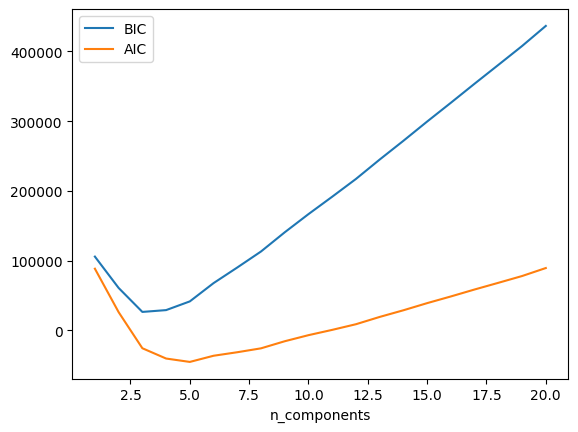

In [51]:
#Plot BIC and AIC
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(pc)
          for n in n_components]

plt.plot(n_components, [m.bic(pc) for m in models], label='BIC')
plt.plot(n_components, [m.aic(pc) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The minimum number of clusters ranges from around 3 to 5

6.	Plot the results from steps 3 and 4. [15 points]

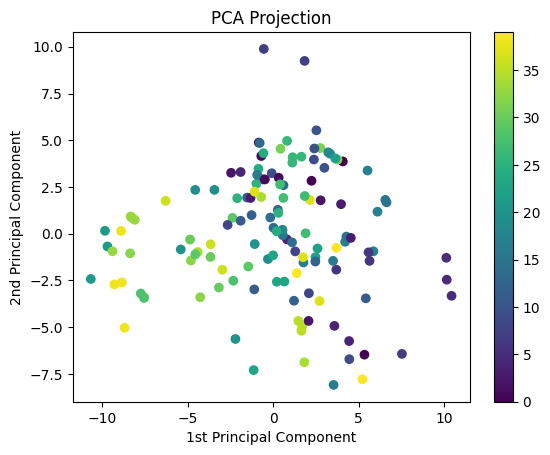

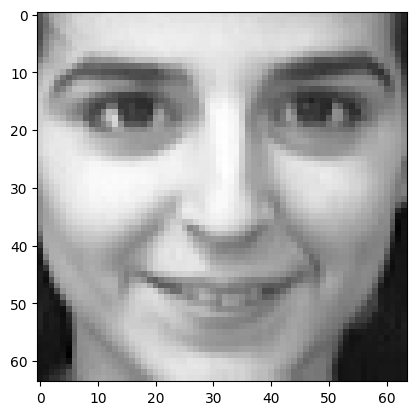

In [50]:
#Plot Results
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], c=y_train)
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
#plt.legend()
plt.colorbar()
plt.title("PCA Projection")
plt.show()

plt.imshow(np.array(X_train.iloc[0]).reshape(64,64), cmap="gray")

7.	Output the hard clustering assignments for each instance to identify which cluster each image belongs to. [2.5 points]


8.	Output the soft clustering probabilities for each instance to show the likelihood of each image belonging to each cluster. [2.5 points]


Data Labels: 
 [0 2 0 1 2 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 1 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 2 2 2 2 2 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 3 3 3 3 3 3 3 3 3 3 0 0
 2 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 0 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 1 1 1 1 3 3 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 2 2 2 2 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 2 2 1 2 2 2 1 1 0 1 1 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 1 2 2 1 2 3 3 3 3 3 3 3 3 3 3 2 1 1 1 1 2 1 2 1 1]
Silhouette Score:  0.09009906


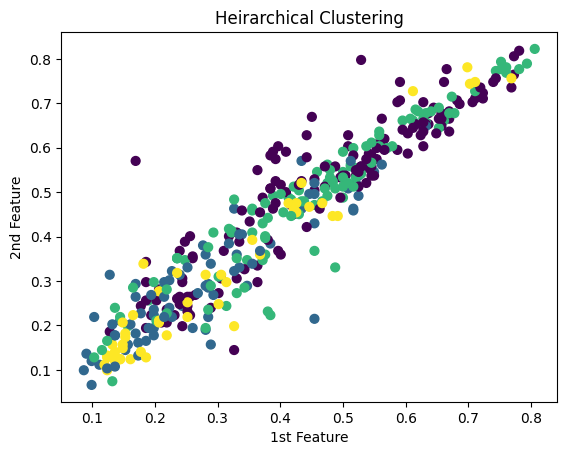

In [52]:
# Heirarchical Clustering
# 4 Clusters was selected as the minimum
ag_clf = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
ag_clf.fit(X)
clf_labels = ag_clf.labels_
print("Data Labels: \n", clf_labels)
print("Silhouette Score: ", silhouette_score(X, clf_labels))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clf_labels, s=40, cmap='viridis')
plt.xlabel("1st Feature")
plt.ylabel("2nd Feature")
plt.title("Heirarchical Clustering")
plt.show()


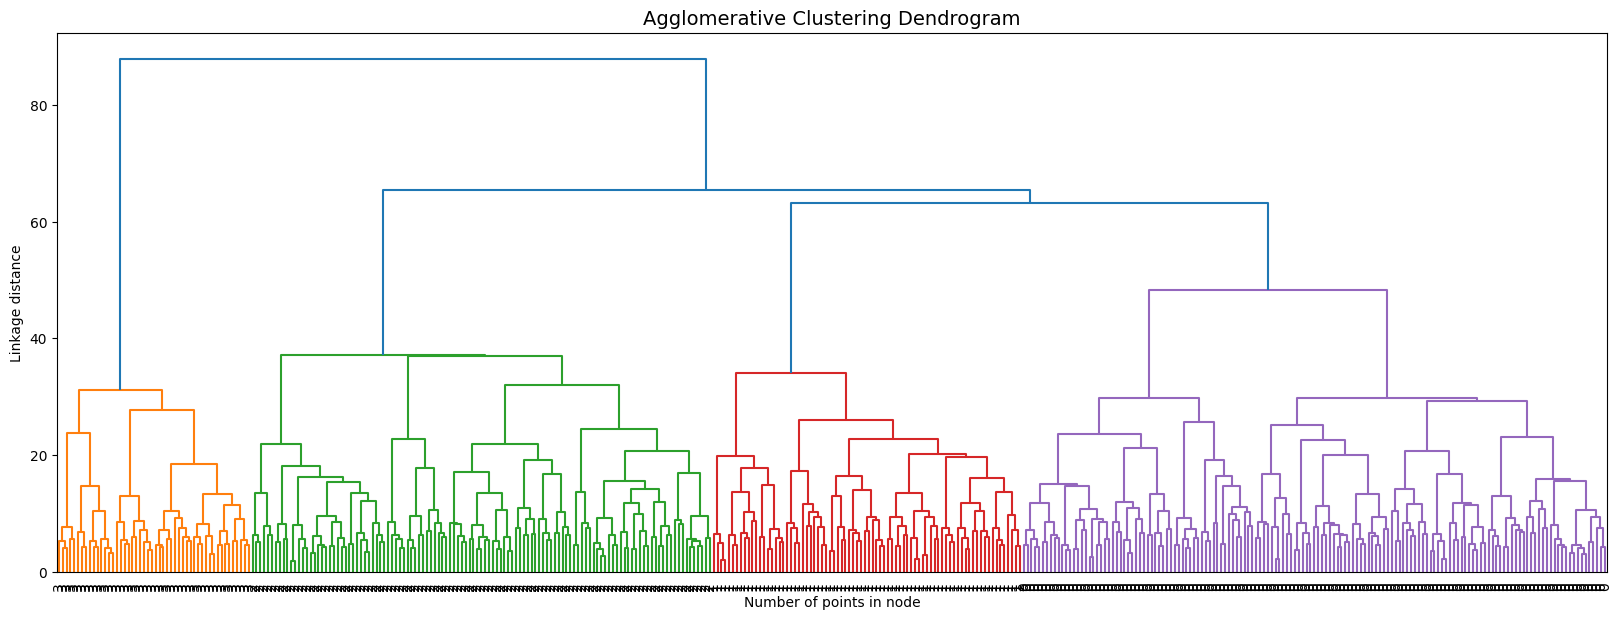

In [53]:
# Dendrogram
plt.figure(figsize=(20, 7))
plt.title("Agglomerative Clustering Dendrogram", fontsize=14)
plt.xlabel("Number of points in node")
plt.ylabel("Linkage distance")
dendro = sch.dendrogram(sch.linkage(X, "ward", metric="euclidean"),
                        labels = clf_labels,
                        leaf_rotation=90,
                        leaf_font_size=10,
                        show_contracted=True)
plt.show()

9.	Use the model to generate some new faces (using the sample() method) and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used). [15 points]


[[0.4278126  0.4616647  0.46678954 ... 0.7074795  0.5281504  0.35636026]
 [0.19259895 0.2001719  0.37139803 ... 0.7601067  0.747383   0.7448798 ]
 [0.5862975  0.6657923  0.75117797 ... 0.6720071  0.65529674 0.53566825]
 ...
 [0.70479125 0.8112145  0.9466337  ... 0.5270837  0.48201713 0.49066523]
 [0.6149321  0.58115685 0.542744   ... 0.9316586  0.7711344  0.66483766]
 [0.48800713 0.6635685  0.82802916 ... 0.25121614 0.23404452 0.25913292]]


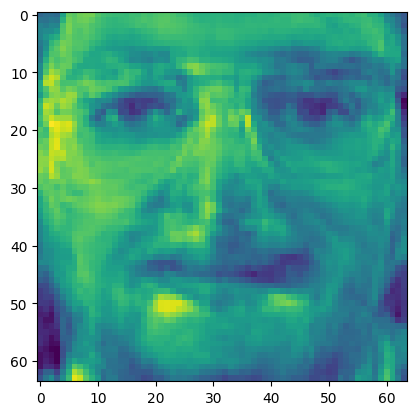

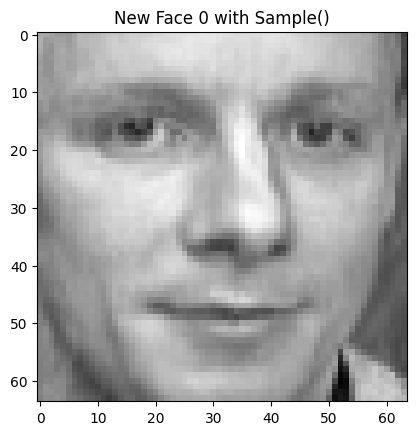

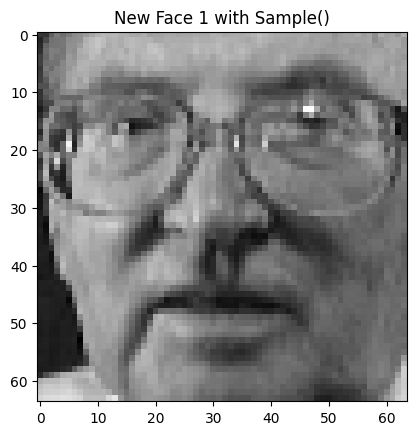

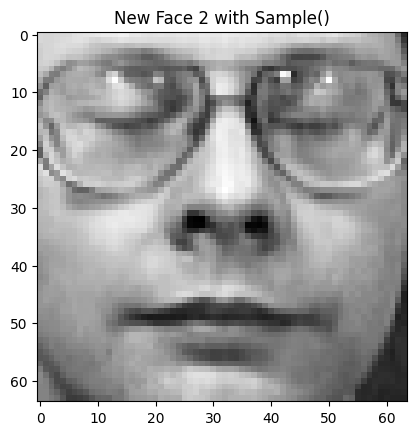

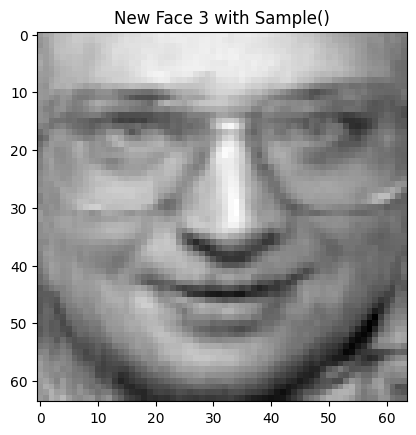

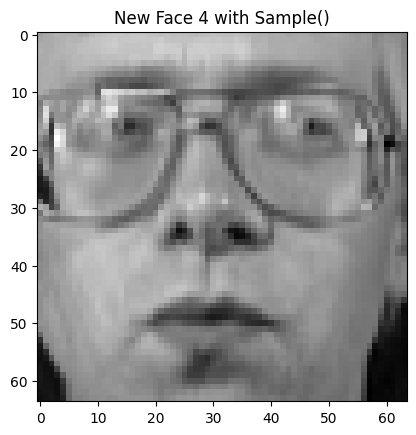

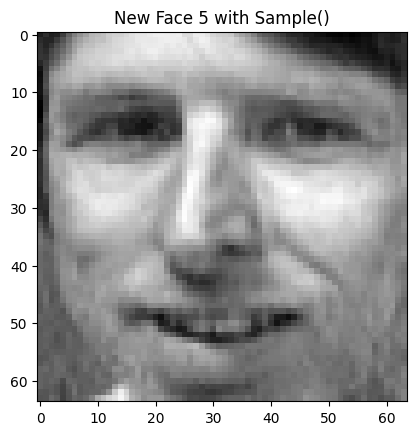

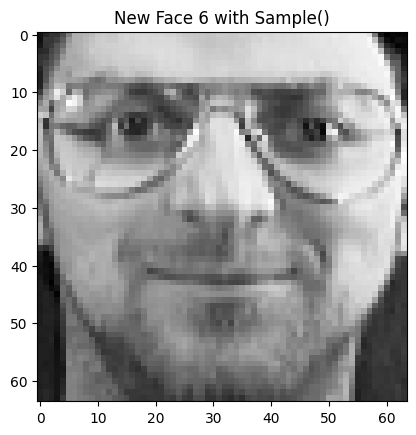

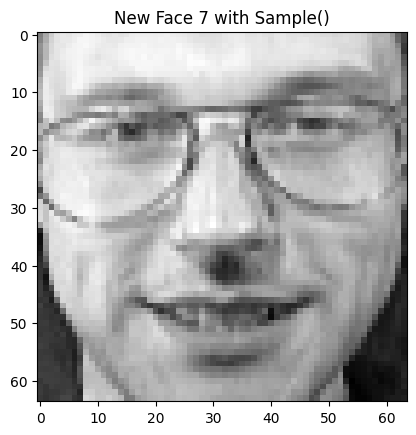

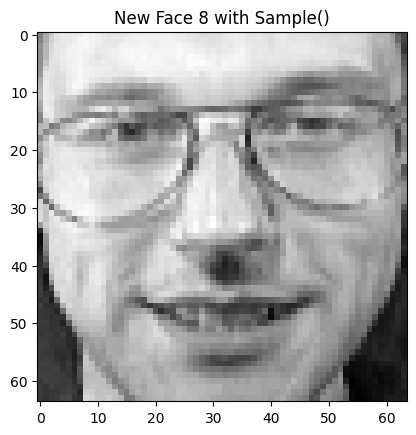

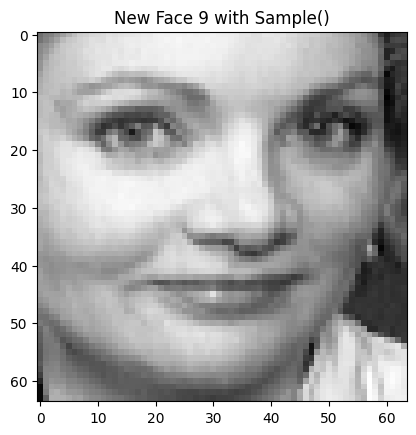

In [54]:
# Generating Faces
original_cluster_centers = ss.inverse_transform(pca.inverse_transform(pc))
print(original_cluster_centers)

plt.imshow(np.array(original_cluster_centers[0]).reshape(64,64))
plt.show()

#plt.title("Original")
#plt.imshow(np.array(X_train.iloc[0]).reshape(64,64), cmap="gray")
#plt.show()

#plt.title("Reconstructed with PCA")
#plt.imshow(np.array(X_train_norm.iloc[0]).reshape(64,64), cmap="gray")
#plt.show()

# generating New faces with Sample()
X_train_norm = pd.DataFrame(pca.inverse_transform(X_train_pca))

for i in range(10):
  plt.title(f"New Face {i} with Sample()")
  plt.imshow(np.array(X_train_norm.sample().iloc[0]).reshape(64,64), cmap="gray")
  plt.show()


10.	Modify some images (e.g., rotate, flip, darken). [15 points]

In [55]:
#No problems were detected, so this section is left empty


Determine if the model can detect the anomalies produced in step 10 by comparing the output of the score_samples() method for normal images and for anomalies. [10 points]